In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('..\data\world_bank_data.csv')

In [3]:
data

,Country Name,Country Code,Time,Time Code,Alternative and nuclear energy (% of total energy use) [EG.USE.COMM.CL.ZS],"Net financial flows, bilateral (NFL, current US$) [DT.NFL.BLAT.CD]",Energy use (kg of oil equivalent per capita) [EG.USE.PCAP.KG.OE],"Unemployment, total (% of total labor force) (modeled ILO estimate) [SL.UEM.TOTL.ZS]",Gross national expenditure (% of GDP) [NE.DAB.TOTL.ZS],"Inflation, GDP deflator (annual %) [NY.GDP.DEFL.KD.ZG]","Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]","Official exchange rate (LCU per US$, period average) [PA.NUS.FCRF]"
0,China,CHN,1987.0,YR1987,1.14254911357064,7750883.9,694.422359979152,..,100.10344321792,5.082516,7.23383553065609,3.7221
1,China,CHN,1988.0,YR1988,1.18289992340014,272475008.1,720.341495783521,..,101.193783428888,12.107661,18.8118179448753,3.7221
2,China,CHN,1989.0,YR1989,1.25692984402683,1170569555,724.116105126715,..,101.491839053557,8.602465,18.2456383621648,3.76510833333333
3,China,CHN,1990.0,YR1990,0.918711738632104,788955230.6,766.995329395649,..,97.8069718218806,5.711224,3.05229012075233,4.78320833333333
4,China,CHN,1991.0,YR1991,0.989355243402051,729565658,736.851801386885,2.37,97.1551516004424,6.714537,3.55668565220452,5.32339166666667
...,...,...,...,...,...,...,...,...,...,...,...,...
180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183,Data from database: World Development Indicators,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Mapping of old column names to new short names
mapping = {
    'Country Name': 'Country',
    'Country Code': 'Code',
    'Time': 'Time',
    'Time Code': 'Time_Code',
    'Alternative and nuclear energy (% of total energy use) [EG.USE.COMM.CL.ZS]': 'Alternative_Nuclear_Energy',
    'Net financial flows, bilateral (NFL, current US$) [DT.NFL.BLAT.CD]': 'Net_Financial_Flows',
    'Energy use (kg of oil equivalent per capita) [EG.USE.PCAP.KG.OE]': 'Energy_Use',
    'Unemployment, total (% of total labor force) (modeled ILO estimate) [SL.UEM.TOTL.ZS]': 'Unemployment',
    'Gross national expenditure (% of GDP) [NE.DAB.TOTL.ZS]': 'Gross_National_Expenditure',
    'Inflation, GDP deflator (annual %) [NY.GDP.DEFL.KD.ZG]': 'Inflation_GDP_Deflator',
    'Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]': 'Inflation_CPI',
    'Official exchange rate (LCU per US$, period average) [PA.NUS.FCRF]': 'Exchange_Rate'
}

# Rename the columns using the mapping
data = data.rename(columns=mapping)


In [5]:
data

,Country,Code,Time,Time_Code,Alternative_Nuclear_Energy,Net_Financial_Flows,Energy_Use,Unemployment,Gross_National_Expenditure,Inflation_GDP_Deflator,Inflation_CPI,Exchange_Rate
0,China,CHN,1987.0,YR1987,1.14254911357064,7750883.9,694.422359979152,..,100.10344321792,5.082516,7.23383553065609,3.7221
1,China,CHN,1988.0,YR1988,1.18289992340014,272475008.1,720.341495783521,..,101.193783428888,12.107661,18.8118179448753,3.7221
2,China,CHN,1989.0,YR1989,1.25692984402683,1170569555,724.116105126715,..,101.491839053557,8.602465,18.2456383621648,3.76510833333333
3,China,CHN,1990.0,YR1990,0.918711738632104,788955230.6,766.995329395649,..,97.8069718218806,5.711224,3.05229012075233,4.78320833333333
4,China,CHN,1991.0,YR1991,0.989355243402051,729565658,736.851801386885,2.37,97.1551516004424,6.714537,3.55668565220452,5.32339166666667
...,...,...,...,...,...,...,...,...,...,...,...,...
180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183,Data from database: World Development Indicators,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# drop Code,Time_Code column
data.drop(['Code','Time_Code'],axis=1,inplace=True)

In [7]:
data.drop(['Alternative_Nuclear_Energy'],axis=1,inplace=True)

In [8]:
data

,Country,Time,Net_Financial_Flows,Energy_Use,Unemployment,Gross_National_Expenditure,Inflation_GDP_Deflator,Inflation_CPI,Exchange_Rate
0,China,1987.0,7750883.9,694.422359979152,..,100.10344321792,5.082516,7.23383553065609,3.7221
1,China,1988.0,272475008.1,720.341495783521,..,101.193783428888,12.107661,18.8118179448753,3.7221
2,China,1989.0,1170569555,724.116105126715,..,101.491839053557,8.602465,18.2456383621648,3.76510833333333
3,China,1990.0,788955230.6,766.995329395649,..,97.8069718218806,5.711224,3.05229012075233,4.78320833333333
4,China,1991.0,729565658,736.851801386885,2.37,97.1551516004424,6.714537,3.55668565220452,5.32339166666667
...,...,...,...,...,...,...,...,...,...
180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183,Data from database: World Development Indicators,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
data.isna().sum()

Country                       3
Time                          5
Net_Financial_Flows           5
Energy_Use                    5
Unemployment                  5
Gross_National_Expenditure    5
Inflation_GDP_Deflator        5
Inflation_CPI                 5
Exchange_Rate                 5
dtype: int64

In [10]:
data.dropna(inplace=True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country                     180 non-null    object 
 1   Time                        180 non-null    float64
 2   Net_Financial_Flows         180 non-null    object 
 3   Energy_Use                  180 non-null    object 
 4   Unemployment                180 non-null    object 
 5   Gross_National_Expenditure  180 non-null    object 
 6   Inflation_GDP_Deflator      180 non-null    float64
 7   Inflation_CPI               180 non-null    object 
 8   Exchange_Rate               180 non-null    object 
dtypes: float64(2), object(7)
memory usage: 14.1+ KB


In [ ]:
# convert to date time
data['Time'] = pd.to_datetime(data['Time'], format='%Y')

In [14]:
# exchange rate, Inflation_CPI, Exchange_Rate, Gross_National_Expenditure, Net_Financial_Flows,Unemployment, Energy_Use
data['Exchange_Rate'] = pd.to_numeric(data['Exchange_Rate'], errors='coerce')
data['Inflation_CPI'] = pd.to_numeric(data['Inflation_CPI'], errors='coerce')
data['Gross_National_Expenditure'] = pd.to_numeric(data['Gross_National_Expenditure'], errors='coerce')
data['Net_Financial_Flows'] = pd.to_numeric(data['Net_Financial_Flows'], errors='coerce')
data['Unemployment'] = pd.to_numeric(data['Unemployment'], errors='coerce')
data['Energy_Use'] = pd.to_numeric(data['Energy_Use'], errors='coerce')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Country                     180 non-null    object        
 1   Time                        180 non-null    datetime64[ns]
 2   Net_Financial_Flows         44 non-null     float64       
 3   Energy_Use                  141 non-null    float64       
 4   Unemployment                160 non-null    float64       
 5   Gross_National_Expenditure  108 non-null    float64       
 6   Inflation_GDP_Deflator      180 non-null    float64       
 7   Inflation_CPI               176 non-null    float64       
 8   Exchange_Rate               107 non-null    float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 14.1+ KB


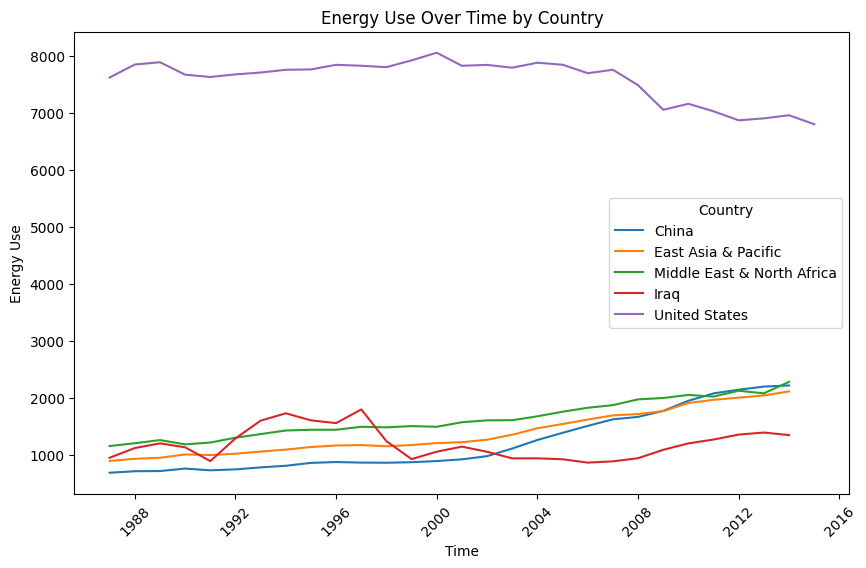

In [16]:
# plot country vs time
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='Time', y='Energy_Use', hue='Country')
plt.title('Energy Use Over Time by Country')
plt.xlabel('Time')
plt.ylabel('Energy Use')
plt.xticks(rotation=45)
plt.show()

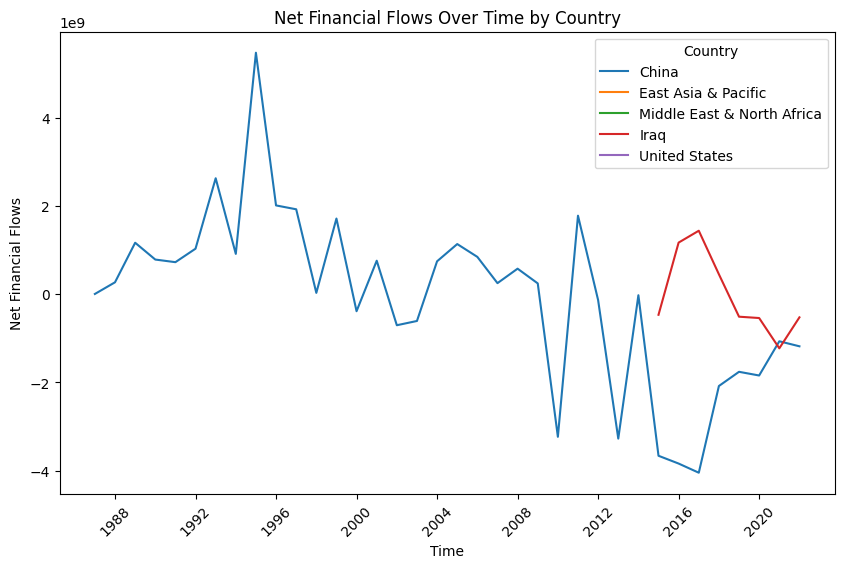

In [17]:
# net financial flow vs time
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='Time', y='Net_Financial_Flows', hue='Country')
plt.title('Net Financial Flows Over Time by Country')
plt.xlabel('Time')
plt.ylabel('Net Financial Flows')
plt.xticks(rotation=45)
plt.show()

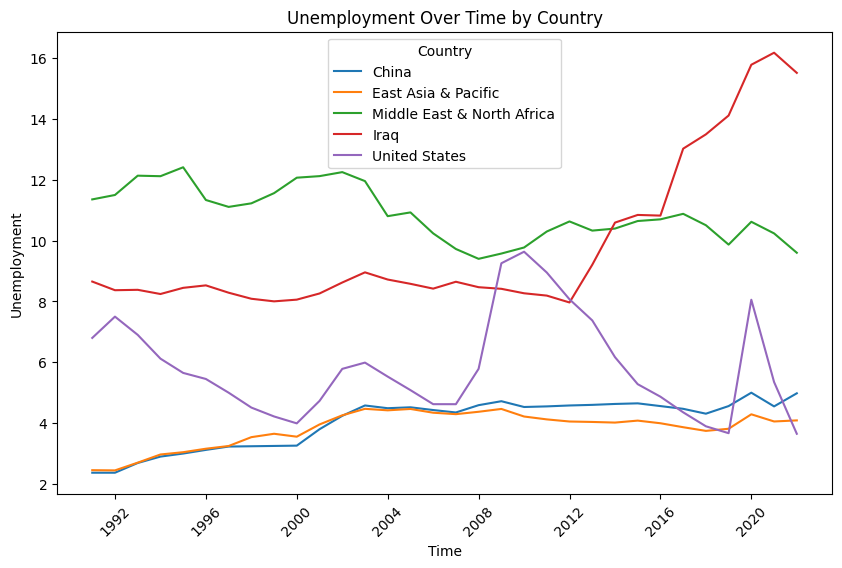

In [19]:
# Unemployment vs time
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='Time', y='Unemployment', hue='Country')
plt.title('Unemployment Over Time by Country')
plt.xlabel('Time')
plt.ylabel('Unemployment')
plt.xticks(rotation=45)
plt.show()

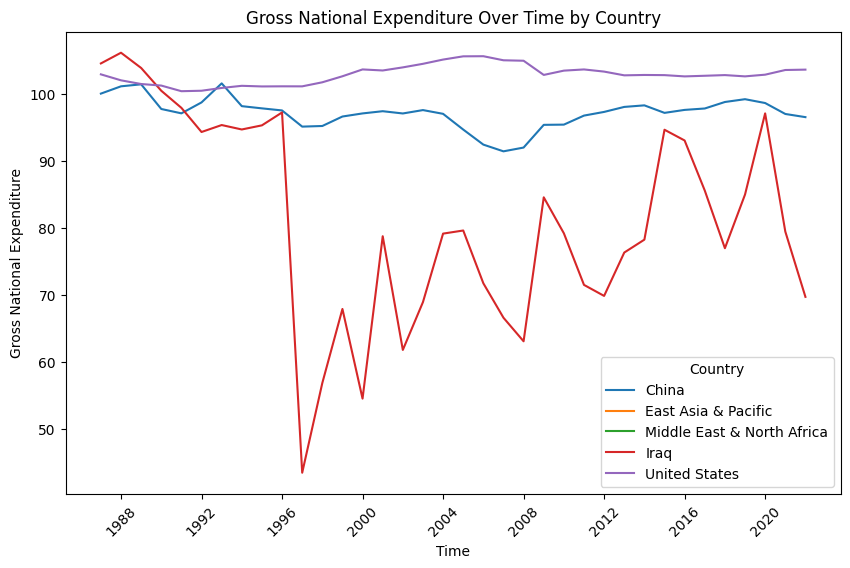

In [20]:
# Gross_National_Expenditure vs time
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='Time', y='Gross_National_Expenditure', hue='Country')
plt.title('Gross National Expenditure Over Time by Country')
plt.xlabel('Time')
plt.ylabel('Gross National Expenditure')
plt.xticks(rotation=45)
plt.show()

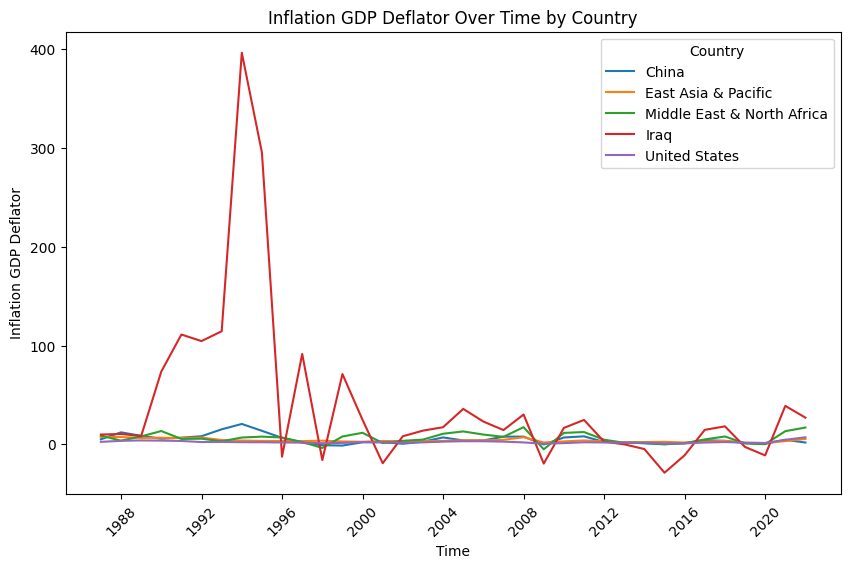

In [21]:
# Inflation_GDP_Deflator vs time
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='Time', y='Inflation_GDP_Deflator', hue='Country')
plt.title('Inflation GDP Deflator Over Time by Country')
plt.xlabel('Time')
plt.ylabel('Inflation GDP Deflator')
plt.xticks(rotation=45)
plt.show()

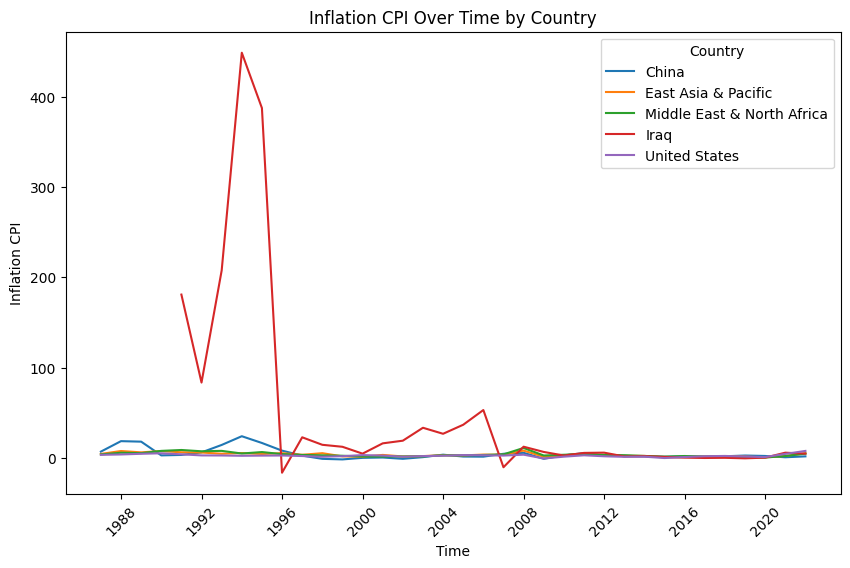

In [22]:
#  Inflation_CPI vs time
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='Time', y='Inflation_CPI', hue='Country')
plt.title('Inflation CPI Over Time by Country')
plt.xlabel('Time')
plt.ylabel('Inflation CPI')
plt.xticks(rotation=45)
plt.show()

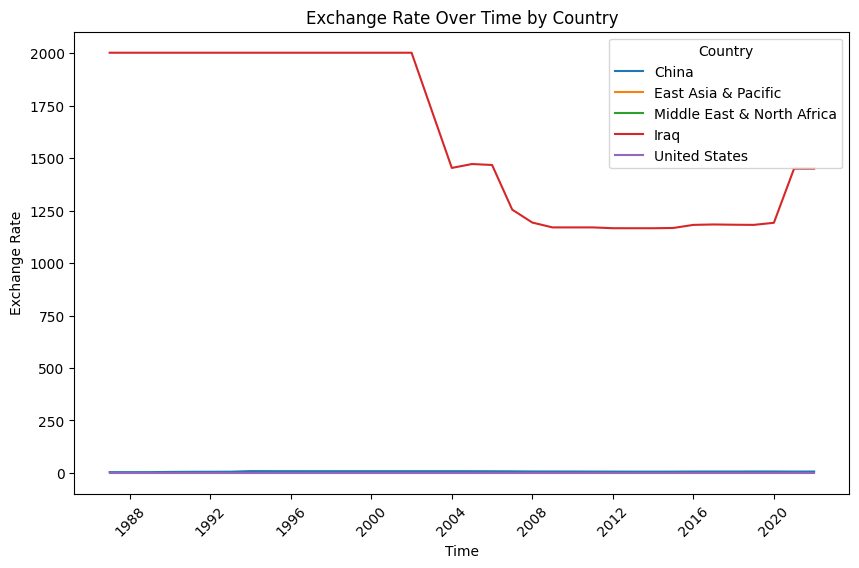

In [23]:
# Exchange_Rate vs time
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='Time', y='Exchange_Rate', hue='Country')
plt.title('Exchange Rate Over Time by Country')
plt.xlabel('Time')
plt.ylabel('Exchange Rate')
plt.xticks(rotation=45)
plt.show()